# **Phase 2 - Inference**

**Team 03:**

- Bruno Fernandes, up202108871
- Hugo Abelheira, up202409899
- Luís Pereira, up200502498

## **Table of Contents**

* [Introduction](#intro)
    * [Phase 1 Summary](#p1summary)
    * [Report Overview](#report)
    * [Overview of Methodology](#overview)
* [Statistical Modelling](#modelling)
    * [Critique & Limitations](#limits)
* [Summary & Conclusions](#end)
    * [Project Summary](#whatwedid)
    * [Summary of Findings](#summary)
    * [Conclusion](#conclusion)

## **Introduction** <a class="anchor" id="intro"></a>

### **Phase 1 Summary** <a class="anchor" id="p1summary"></a>

### **Report Overview** <a class="anchor" id="report"></a>

### **Overview of Methodology** <a class="anchor" id="overview"></a>

## **Statistical Modelling** <a class="anchor" id="modelling"></a>

### **Critique & Limitations** <a class="anchor" id="limits"></a>
vantagens e desvantangens do método escolhido para retirar as inferências

## **Summary & Conclusions** <a class="anchor" id="end"></a>

### **Project Summary** <a class="anchor" id="whatwedid"></a>
resumidamente o que fizemos na fase 1 e na fase 2
### **Summary of Findings** <a class="anchor" id="summary"></a>
resumidamente, o que descobrimos sobre o nosso problema
### **Conclusion** <a class="anchor" id="conclusion"></a>
conclusoes sobre o nosso problema e como se relacionam ao nosso objetivo

In [1]:
# load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
dataset = pd.read_excel('datasets/clean_dataset.xlsx')

dataset

,Codigo_SGIF,Ano,AreaPov_ha,AreaMato_ha,AreaAgric_ha,AreaTotal_ha,ClasseArea,Duracao_Horas,IncSup24horas,Distrito,Concelho,FonteAlerta,TypeArea
0,DM2111,2011,0.00,0.0100,0.0,0.0100,]0 a 1 ha[,0.733333,0,Porto,Penafiel,Populares,Forest
1,DM2113,2011,0.00,0.0050,0.0,0.0050,]0 a 1 ha[,0.783333,0,Porto,Vila Nova de Gaia,Populares,Forest
2,DM2116,2011,0.04,0.0000,0.0,0.0400,]0 a 1 ha[,2.033333,0,Porto,Vila Nova de Gaia,Populares,Rural
3,BL1112,2011,5.00,135.0000,0.0,140.0000,[100 a 500 ha],8.083333,0,Viseu,São Pedro do Sul,Populares,Forest
4,BL1113,2011,0.00,0.1000,0.0,0.1000,]0 a 1 ha[,2.333333,0,Viseu,Castro Daire,Populares,Forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18412,DM2203922,2020,0.00,0.0050,0.0,0.0050,]0 a 1 ha[,0.633333,0,Porto,Paços de Ferreira,Outros,Forest
18413,BL120914,2020,0.00,0.0100,0.0,0.0100,]0 a 1 ha[,1.283333,0,Viseu,Cinfães,Populares,Forest
18414,BL120915,2020,0.00,0.0014,0.0,0.0014,]0 a 1 ha[,0.383333,0,Viseu,São João da Pesqueira,Outros,Forest
18415,BL120916,2020,0.00,0.0050,0.0,0.0050,]0 a 1 ha[,0.716667,0,Viseu,Castro Daire,117,Forest


In [2]:
# remove columns Codigo_SGIF, AreaPov_ha, AreaAgric_ha, ClasseArea, IncSup24horas, FonteAlerta
dataset = dataset.drop(columns=['Codigo_SGIF', 'AreaMato_ha', 'AreaPov_ha', 'AreaAgric_ha', 'ClasseArea', 'IncSup24horas', 'FonteAlerta'])
dataset.columns

Index(['Ano', 'AreaTotal_ha', 'Duracao_Horas', 'Distrito', 'Concelho',
       'TypeArea'],
      dtype='object')

In [3]:
dataset.describe()

,Ano,AreaMato_ha,AreaTotal_ha,Duracao_Horas
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,2014.133735,1.867030,2.908992,1.944444
std,3.493397,28.702705,48.286181,3.779113
min,2011.000000,0.000000,0.000000,0.016667
25%,2011.000000,0.000000,0.010000,0.666667
50%,2011.000000,0.020000,0.050000,1.133333
75%,2016.000000,0.100000,0.210000,2.016667
max,2020.000000,2063.800000,3745.000000,182.850000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417 entries, 0 to 18416
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano            18417 non-null  int64  
 1   AreaMato_ha    18417 non-null  float64
 2   AreaTotal_ha   18417 non-null  float64
 3   Duracao_Horas  18417 non-null  float64
 4   Distrito       18417 non-null  object 
 5   Concelho       18417 non-null  object 
 6   TypeArea       18417 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1007.3+ KB


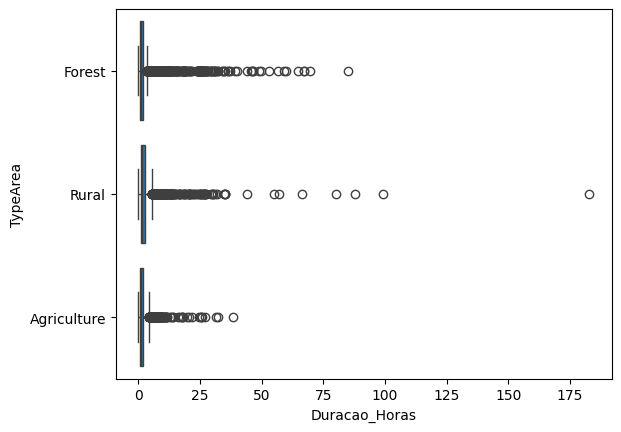

In [5]:
# make an horizontally side-by-side boxplot of the 'TypeArea' and the 'Duracao_horas' columns
sns.boxplot(y='TypeArea', x='Duracao_Horas', data=dataset)
plt.show()

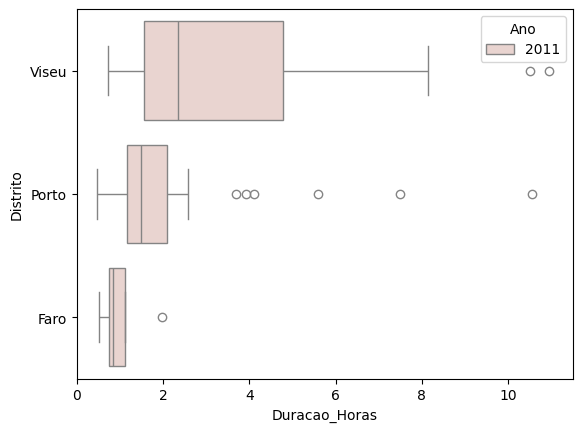

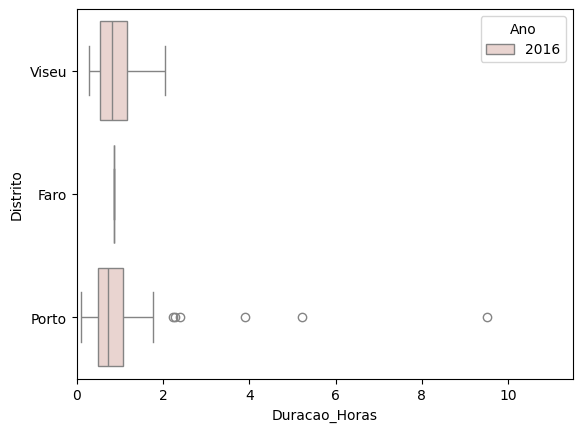

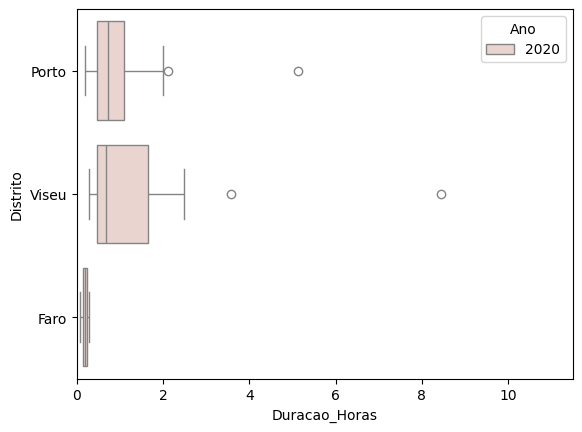

In [6]:
sample_size = 60

# make horizontal boxplots to compare Duracao_Horas across Distrito for each Ano
dataset_2011 = dataset[dataset['Ano'] == 2011].sample(sample_size, random_state=999)
dataset_2016 = dataset[dataset['Ano'] == 2016].sample(sample_size, random_state=999)
dataset_2020 = dataset[dataset['Ano'] == 2020].sample(sample_size, random_state=999)

x_limit = max(dataset_2011['Duracao_Horas'].max(), 
              dataset_2016['Duracao_Horas'].max(), 
              dataset_2020['Duracao_Horas'].max())

coefficient = 1.05

sns.boxplot(y='Distrito', x='Duracao_Horas', data=dataset_2011, hue='Ano')
plt.xlim(0, x_limit * coefficient)
plt.show()

sns.boxplot(y='Distrito', x='Duracao_Horas', data=dataset_2016, hue='Ano')
plt.xlim(0, x_limit * coefficient)
plt.show()

sns.boxplot(y='Distrito', x='Duracao_Horas', data=dataset_2020, hue='Ano')
plt.xlim(0, x_limit * coefficient)
plt.show()

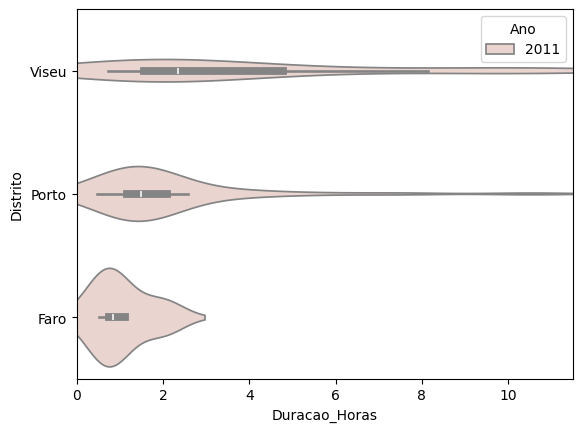

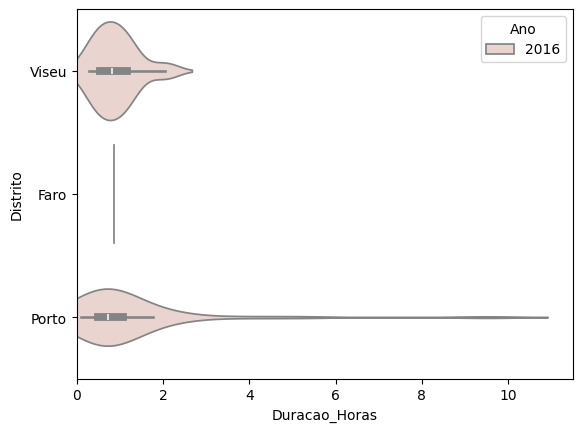

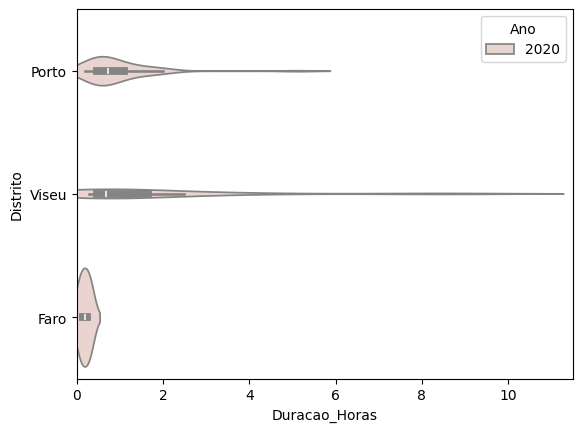

In [7]:
# make violin plots
sns.violinplot(y='Distrito', x='Duracao_Horas', data=dataset_2011, hue='Ano')
plt.xlim(0, x_limit * coefficient)
plt.show()

sns.violinplot(y='Distrito', x='Duracao_Horas', data=dataset_2016, hue='Ano')
plt.xlim(0, x_limit * coefficient)
plt.show()

sns.violinplot(y='Distrito', x='Duracao_Horas', data=dataset_2020, hue='Ano')
plt.xlim(0, x_limit * coefficient)
plt.show()

**(just saying facts, probably delete later)**

We observe that throughout the years the average duration of the wildfires across all regions seems to go down.
Also, we observe that the average and the median values are very small. This means most of the fires are short, but it also means that all the fires that last a few hours are extreme outliers that have a huge impact on the mean.

### **Perform ANOVA**

We will perform an ANOVA test to check if the average duration of the wildfires is the same across all regions.

We start by checking the conditions for the ANOVA test: normality and independence.

#### **Normality**

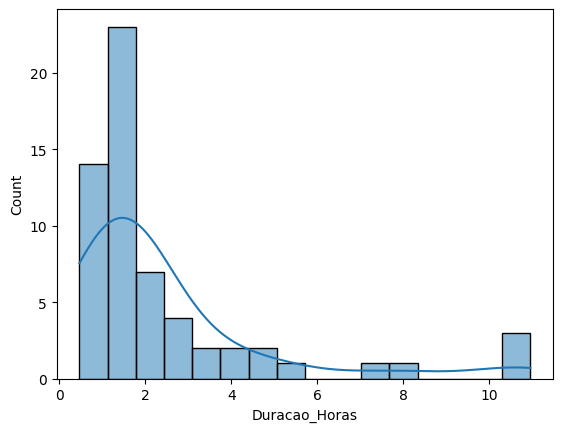

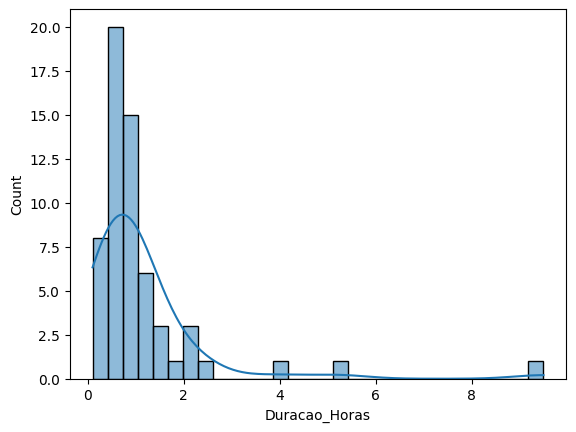

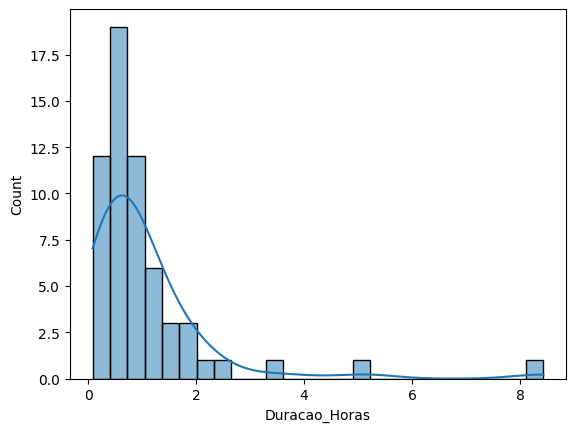

In [8]:
# check the distribution of the 'Duracao_Horas' column
sns.histplot(dataset_2011['Duracao_Horas'], kde=True)
plt.show()

sns.histplot(dataset_2016['Duracao_Horas'], kde=True)
plt.show()

sns.histplot(dataset_2020['Duracao_Horas'], kde=True)
plt.show()

In [ ]:
# check if each of the datasets is normally distributed using the Central Limit Theorem


As we can see in the histograms above, the data is not normally distributed. So we will perform a log transformation to try to make the data normally distributed.

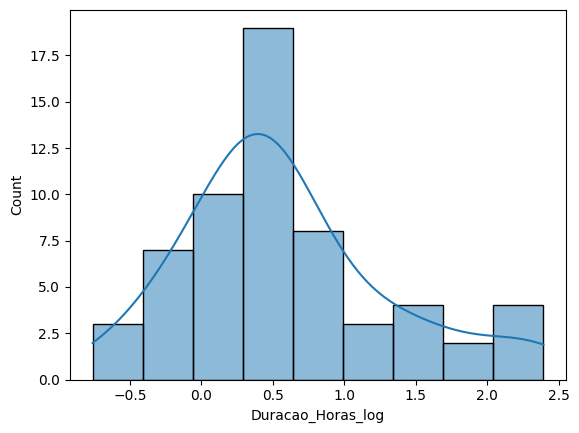

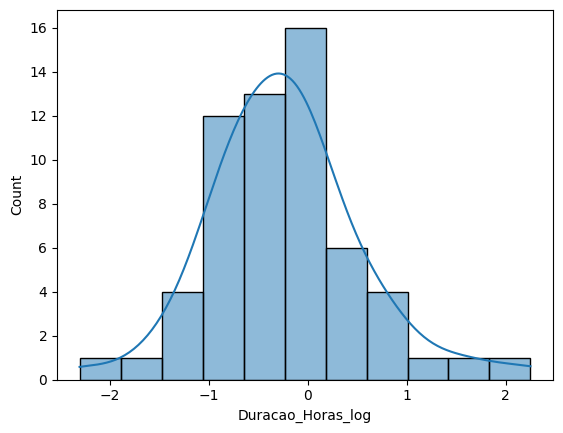

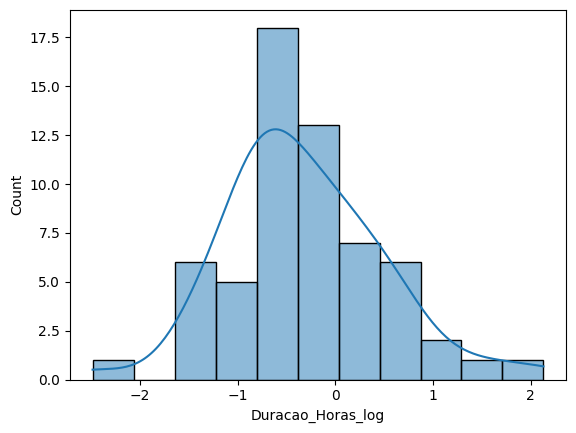

In [9]:
# perform a log transformation on the 'Duracao_Horas' column
import numpy as np

dataset_2011['Duracao_Horas_log'] = np.log(dataset_2011['Duracao_Horas'])
dataset_2016['Duracao_Horas_log'] = np.log(dataset_2016['Duracao_Horas'])
dataset_2020['Duracao_Horas_log'] = np.log(dataset_2020['Duracao_Horas'])

# check the distribution of the 'Duracao_Horas_log' column
sns.histplot(dataset_2011['Duracao_Horas_log'], kde=True)
plt.show()

sns.histplot(dataset_2016['Duracao_Horas_log'], kde=True)
plt.show()

sns.histplot(dataset_2020['Duracao_Horas_log'], kde=True)
plt.show()

When we perform the log transformation, we can see that the data is now very close to a normal distribution.

In [10]:
# perform anova test on the 'Duracao_Horas' column
from scipy.stats import f_oneway

statistic, p_value = f_oneway(dataset_2011['Duracao_Horas'], dataset_2016['Duracao_Horas'], dataset_2020['Duracao_Horas'])

print('statistic:', statistic)
print('p_value:', p_value)

if p_value < 0.05:
    print('\nReject the null hypothesis')
    
else:
    print('\nFail to reject the null hypothesis')

statistic: 11.881394055757234
p_value: 1.439359400406707e-05

Reject the null hypothesis


### **Perform Kruskal-Wallis Test**

Since the data is not normally distributed, we will perform a Kruskal-Wallis test to check if the average duration of the wildfires is the same across all regions.

The Kruskal-Wallis test is a non-parametric test that is used to determine whether there are statistically significant differences between the medians of three or more independent groups.

The null hypothesis of the Kruskal-Wallis test is that the medians of the groups are equal. The alternative hypothesis is that at least one of the group medians is different from the others.

We will use a significance level of 0.05.

In [12]:
# perform Kruskal-Wallis test to compare the median of 'Duracao_Horas' through the years
from scipy.stats import kruskal

# Filter Duracao_Horas for each Distrito
data_porto = dataset[dataset['Distrito'] == 'Porto'].sample(sample_size, random_state=999)['Duracao_Horas']
data_viseu = dataset[dataset['Distrito'] == 'Viseu'].sample(sample_size, random_state=999)['Duracao_Horas']
data_faro = dataset[dataset['Distrito'] == 'Faro'].sample(sample_size, random_state=999)['Duracao_Horas']

h_stat, p_value = kruskal(data_porto, data_viseu, data_faro)

print('statistic:', h_stat)
print('p_value:', p_value)

if p_value < 0.05:
    print('\nReject the null hypothesis')
else:
    print('\nFail to reject the null hypothesis')

statistic: 17.881952624870646
p_value: 0.00013091316561709355

Reject the null hypothesis
